In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
import seaborn as sns

In [2]:
data_training=r"C:\Users\gauri\image_detection\actual\train"
data_testing=r"C:\Users\gauri\image_detection\actual\test"
data_validate=r"C:\Users\gauri\image_detection\actual\validation"

In [3]:
img_width=180
img_height=180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_training,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32, 
    validation_split=False
)

Found 4638 files belonging to 43 classes.


In [5]:
data_category= data_train.class_names

In [6]:
data_val= tf.keras.utils.image_dataset_from_directory(data_validate, image_size=(img_width, img_height), batch_size=32, shuffle=False, validation_split=False)

Found 561 files belonging to 43 classes.


In [7]:
data_test= tf.keras.utils.image_dataset_from_directory(data_testing, image_size=(img_width, img_height), batch_size=32, shuffle=False, validation_split=False)

Found 429 files belonging to 43 classes.


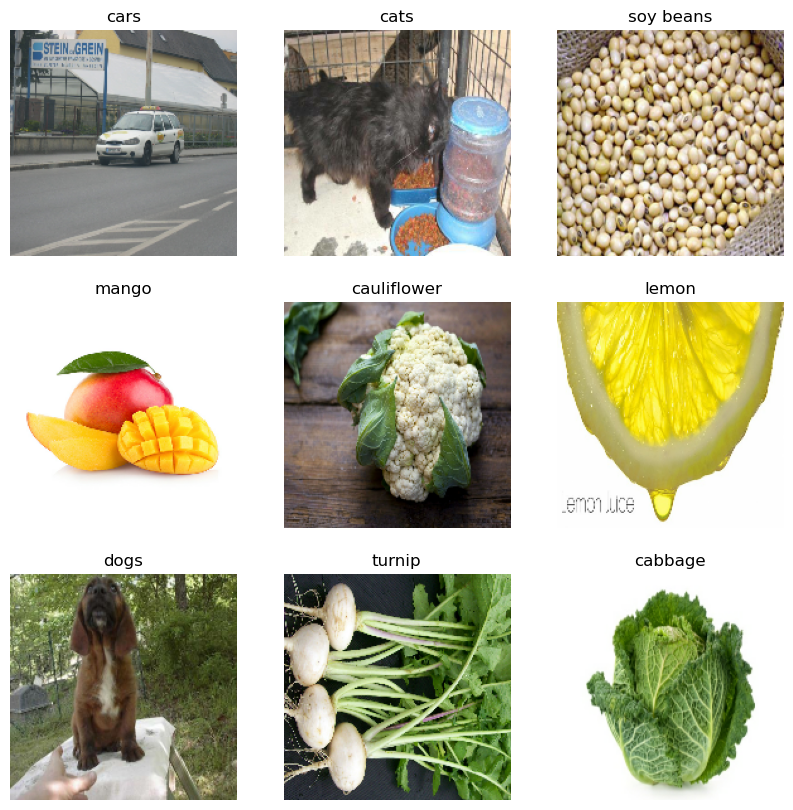

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

print(type(data_training))

In [9]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
])

In [10]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

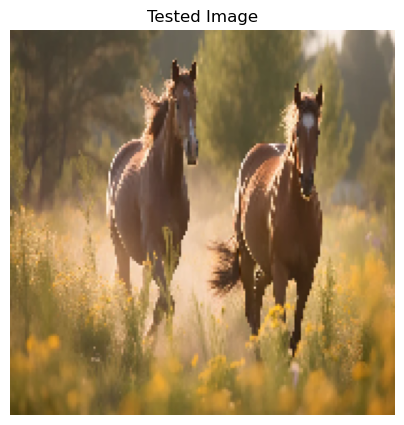

In [11]:
image=r"C:\Users\gauri\image_detection\test\Horses_in_Meadow_800x.webp"
image= tf.keras.utils.load_img(image, target_size=(img_height, img_width))
plt.figure(figsize=(5, 5))
plt.imshow(image)  # Show the image
plt.title("Tested Image")  # Add a title to the image
plt.axis('off')  # Hide the axis
plt.show()
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr, 0)

In [12]:
epochs_size=25
history=model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 98s 628ms/step - accuracy: 0.1170 - loss: 3.7553 - val_accuracy: 0.4367 - val_loss: 2.1100
Epoch 2/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 93s 623ms/step - accuracy: 0.3744 - loss: 2.2260 - val_accuracy: 0.6310 - val_loss: 1.3762
Epoch 3/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 93s 632ms/step - accuracy: 0.5494 - loss: 1.5481 - val_accuracy: 0.6756 - val_loss: 1.1832
Epoch 4/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 93s 621ms/step - accuracy: 0.7122 - loss: 0.9806 - val_accuracy: 0.7879 - val_loss: 0.8814
Epoch 5/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 90s 617ms/step - accuracy: 0.8443 - loss: 0.5371 - val_accuracy: 0.7932 - val_loss: 1.1498
Epoch 6/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 91s 604ms/step - accuracy: 0.9082 - loss: 0.3059 - val_accuracy: 0.8093 - val_loss: 1.0388
Epoch 7/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 91s 623ms/step - accuracy: 0.9385 - loss: 0.2307 - val_accuracy: 0.8271 - val_loss: 0.9722
Epoch 8/25
145/145 ━━━━━━━━━━━━━━━━━━━━ 89s 607ms/step - accuracy: 0.9600 - loss: 0

In [13]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [14]:
score=tf.nn.softmax(predict)

In [15]:
print("Image is {} with accuracy of {:0.2f}".format(data_category[np.argmax(score)], np.max(score)*100))

Image is horses with accuracy of 99.49


Enter the file path of the image:  C:\Users\gauri\image_detection\test\2ecf067a2069128f44d75d25a32e219e.jpg


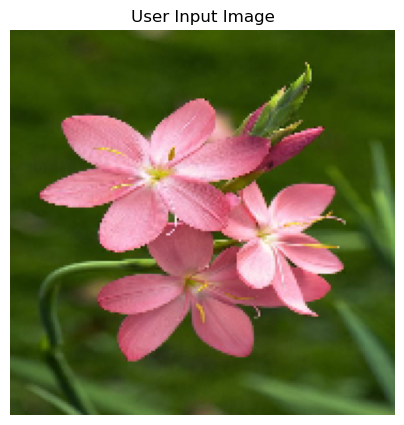

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
The image is predicted as 'flowers' with 100.00% confidence.


In [16]:

def predict_image():
    image_path = input("Enter the file path of the image: ")
    
    try:
        image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
        
        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.title("User Input Image")
        plt.axis('off')
        plt.show()
        
        img_arr = tf.keras.utils.img_to_array(image)  # Convert to array
        img_bat = tf.expand_dims(img_arr, 0)  # Add batch dimension
        
        predict = model.predict(img_bat)
        score = tf.nn.softmax(predict)
        
        print("The image is predicted as '{}' with {:.2f}% confidence."
              .format(data_category[np.argmax(score)], np.max(score) * 100))
    except Exception as e:
        print("An error occurred:", str(e))
        print("Please ensure the file path is correct and the image is accessible.")

predict_image()

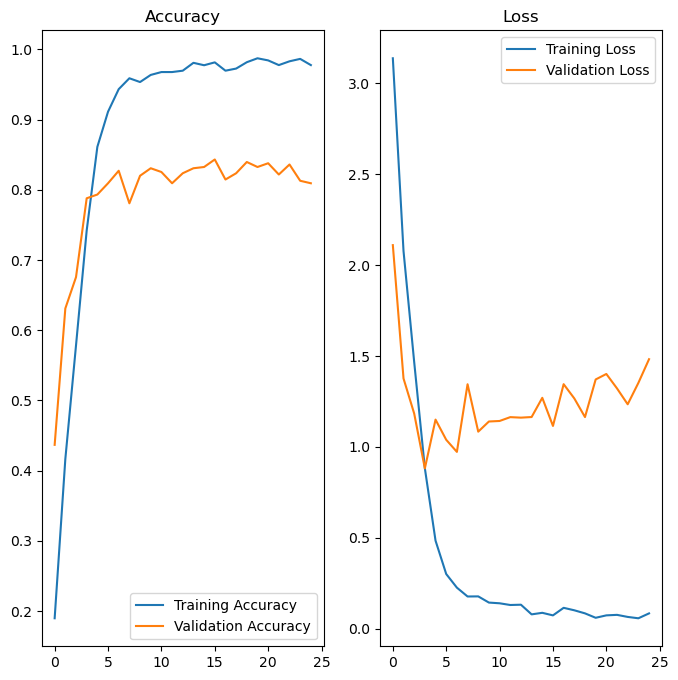

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step


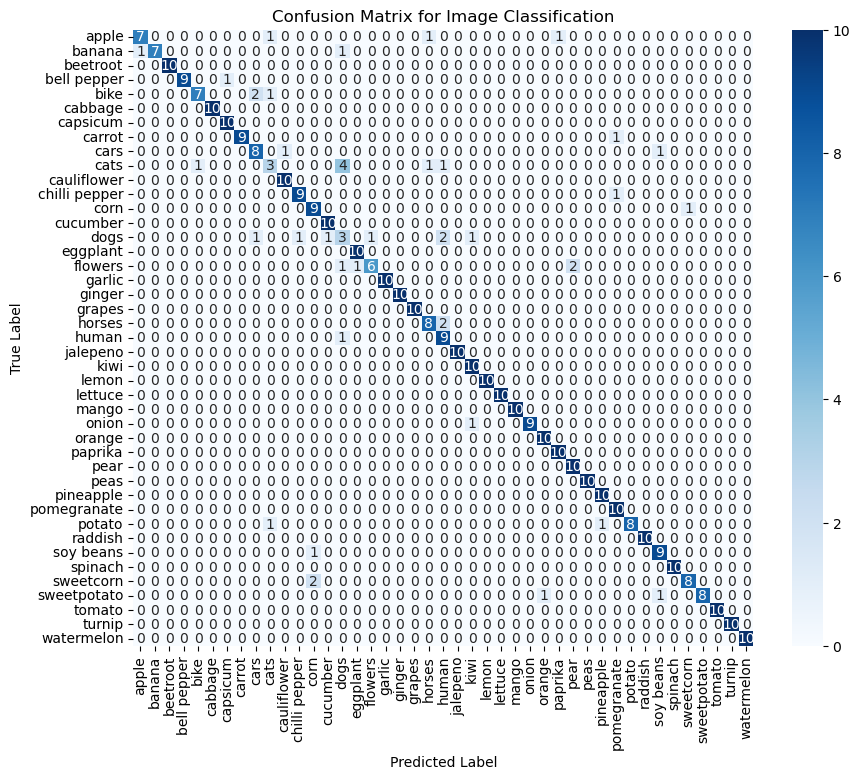

               precision    recall  f1-score   support

        apple       0.88      0.70      0.78        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.90      0.95        10
         bike       0.88      0.70      0.78        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.91      1.00      0.95        10
       carrot       1.00      0.90      0.95        10
         cars       0.73      0.80      0.76        10
         cats       0.50      0.30      0.38        10
  cauliflower       0.91      1.00      0.95        10
chilli pepper       0.90      0.90      0.90        10
         corn       0.75      0.90      0.82        10
     cucumber       0.91      1.00      0.95        10
         dogs       0.30      0.30      0.30        10
     eggplant       0.91      1.00      0.95        10
      flowers       0.86      0.60      0.71        10
       ga

In [18]:
true_labels = []
for image, labels in data_test:
    true_labels.extend(labels.numpy())
predictions = model.predict(data_test)
predicted_labels = np.argmax(predictions, axis=1) 
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data_category, yticklabels=data_category)
plt.title('Confusion Matrix for Image Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(true_labels, predicted_labels, target_names=data_category))